# Using a MESA model

Using a MESA model entails a few changes in the utilization of STARDIS. Firstly, you must change the model type to 'mesa' under the 'model' section, like this:  

```
model:
    type: mesa
    fname: end_core_h_burn.mod
```


Next, you can now specify the outmost depth point for the simulation using the 'truncate_to_shell' parameter. It defaults to -99, which tells the model to use all shells. Place the parameter in the 'model' section, like this: 
```
model:
    type: mesa
    fname: end_core_h_burn.mod
    truncate_to_shell: 40
```

# Imports & Downloads

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tardis.io.atom_data.util import download_atom_data
from stardis.base import run_stardis
from astropy import units as u, constants as const

download_atom_data('kurucz_cd23_chianti_H_He')



Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

Atomic Data kurucz_cd23_chianti_H_He already exists in /home/monkhayd/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5. Will not download - override with force_download=True.


# Simulation

In [3]:

tracing_lambdas = np.mgrid[6540:6590:.01]* u.Angstrom

sim = run_stardis('Tutorial_data/mesa_model_example.yml', tracing_lambdas)
#This uses an example config file that utilizes a mesa model and truncates at the 40th shell

/home/monkhayd/Software/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)
/home/monkhayd/Software/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)


# Plotting

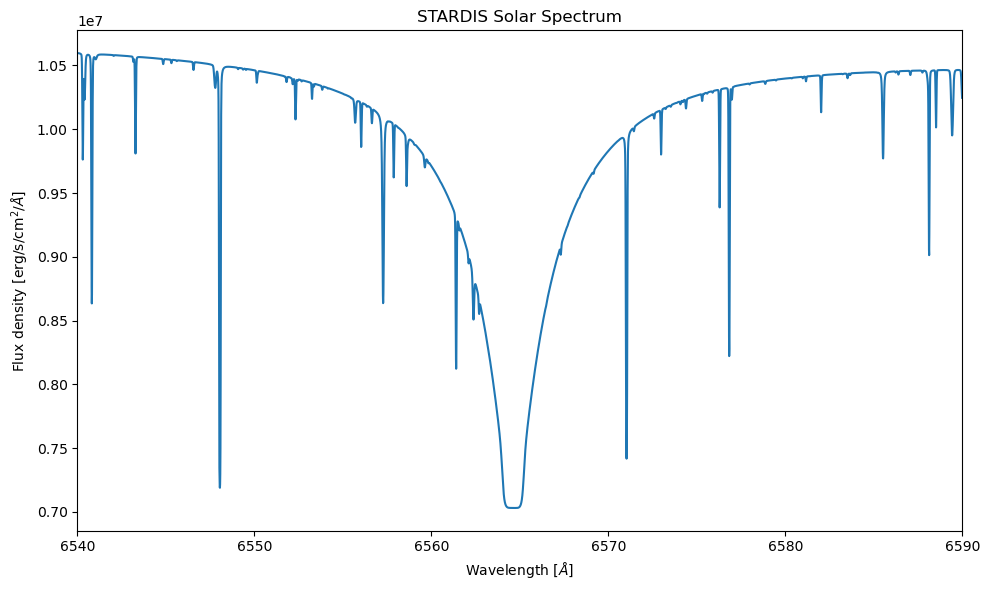

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(sim.lambdas, sim.spectrum_lambda)

plt.xlim((6540,6590))
plt.title("STARDIS Solar Spectrum")
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Flux density [erg/s/cm$^2$/$\AA$]")
plt.tight_layout()

plt.show()